In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets (adjust file paths as necessary)
train_data = pd.read_csv('Train.csv')
val_data = pd.read_csv('Val.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
# Extract features and labels
X_train, y_train = train_data[['x1', 'x2']].values, train_data['label'].values
X_val, y_val = val_data[['x1', 'x2']].values, val_data['label'].values
X_test, y_test = test_data[['x1', 'x2']].values, test_data['label'].values

In [ ]:
# Define parameters to experiment with
gamma_values = [0.01, 0.1, 1, 10]  # Kernel width (gamma) values for the RBF kernel
C_values = [1, 10, 100]
results = {}

In [ ]:
# Train SVM models with RBF kernel for each combination of gamma and C
for gamma in gamma_values:
    for C in C_values:
        model = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
        model.fit(X_train, y_train)

        # Calculate accuracies
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        # Store results
        results[(gamma, C)] = {
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_acc': test_acc,
            'model': model
        }

In [ ]:
# Compile accuracy results into a DataFrame
accuracy_table = pd.DataFrame(
    [(gamma, C, res['train_acc'], res['val_acc'], res['test_acc'])
     for (gamma, C), res in results.items()],
    columns=['Gamma', 'C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
)
print("Accuracy Table:\n", accuracy_table)

Accuracy Table:
     Gamma    C  Train Accuracy  Validation Accuracy  Test Accuracy
0    0.01    1        0.509804             0.503145         0.4250
1    0.01   10        0.509804             0.503145         0.4250
2    0.01  100        0.766488             0.672956         0.7375
3    0.10    1        0.655971             0.578616         0.6625
4    0.10   10        0.998217             1.000000         1.0000
5    0.10  100        1.000000             1.000000         1.0000
6    1.00    1        1.000000             1.000000         1.0000
7    1.00   10        1.000000             1.000000         1.0000
8    1.00  100        0.998217             1.000000         1.0000
9   10.00    1        1.000000             1.000000         1.0000
10  10.00   10        1.000000             0.993711         1.0000
11  10.00  100        1.000000             0.993711         1.0000


<ipython-input-15-fe919062985b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-15-fe919062985b>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


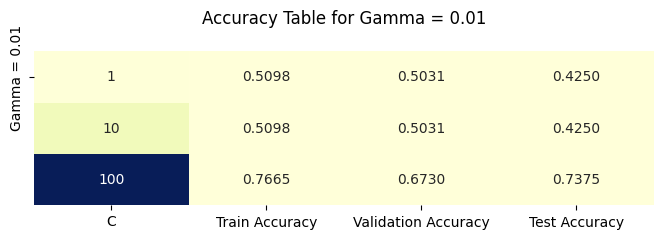

<ipython-input-15-fe919062985b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-15-fe919062985b>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


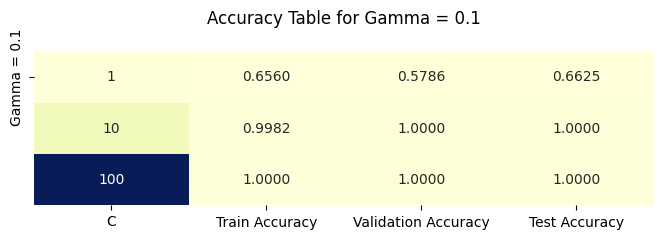

<ipython-input-15-fe919062985b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-15-fe919062985b>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


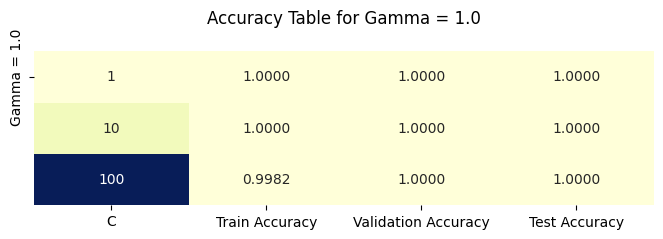

<ipython-input-15-fe919062985b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-15-fe919062985b>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


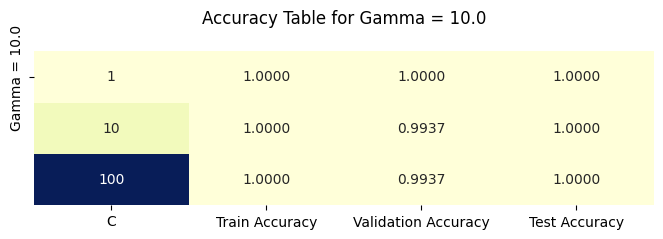

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List unique gamma values in the accuracy table
gammas = accuracy_table['Gamma'].unique()

# Generate a separate heatmap for each gamma value
for gamma in gammas:
    # Filter accuracy_table for the current gamma
    gamma_table = accuracy_table[accuracy_table['Gamma'] == gamma]

    # Convert 'C' column values to integers
    gamma_table['C'] = gamma_table['C'].astype(int)

    # Creating a custom annotation array to format 'C' as integers and other columns with 4 decimals
    annot = gamma_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']].copy()
    annot['C'] = annot['C'].astype(int)  # integer format for C
    annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")

    # Plotting the table with seaborn for a colorful, boxed format
    plt.figure(figsize=(8, 2))
    ax = sns.heatmap(gamma_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']],
                     annot=annot.values, fmt="", cmap="YlGnBu", cbar=False,
                     xticklabels=['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                     yticklabels=[f'Gamma = {gamma}'])

    # Adjusting title and layout
    plt.title(f'Accuracy Table for Gamma = {gamma}', pad=20)
    plt.xlabel("")  # Remove default x-axis label to avoid it at the bottom
    plt.ylabel("")  # Remove default y-axis label
    plt.show()

In [ ]:
# Find the best model based on validation accuracy, then test accuracy, then train accuracy
sorted_table = accuracy_table.sort_values(
    by=['Validation Accuracy', 'Test Accuracy', 'Train Accuracy'],
    ascending=False
)
best_params = sorted_table.iloc[0][['Gamma', 'C']]
best_gamma, best_C = best_params['Gamma'], best_params['C']
best_model = results[(best_gamma, best_C)]['model']
# Print the best parameters and accuracies
print(f"The best gamma is: {best_gamma}")
print(f"The best C value is: {best_C}")
print(f"Validation Accuracy: {results[(best_gamma, best_C)]['val_acc']}")
print(f"Test Accuracy: {results[(best_gamma, best_C)]['test_acc']}")
print(f"Train Accuracy: {results[(best_gamma, best_C)]['train_acc']}")

The best gamma is: 0.1
The best C value is: 100.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Train Accuracy: 1.0


In [ ]:
# Generate confusion matrices for the best model
train_confusion = confusion_matrix(y_train, best_model.predict(X_train))
test_confusion = confusion_matrix(y_test, best_model.predict(X_test))

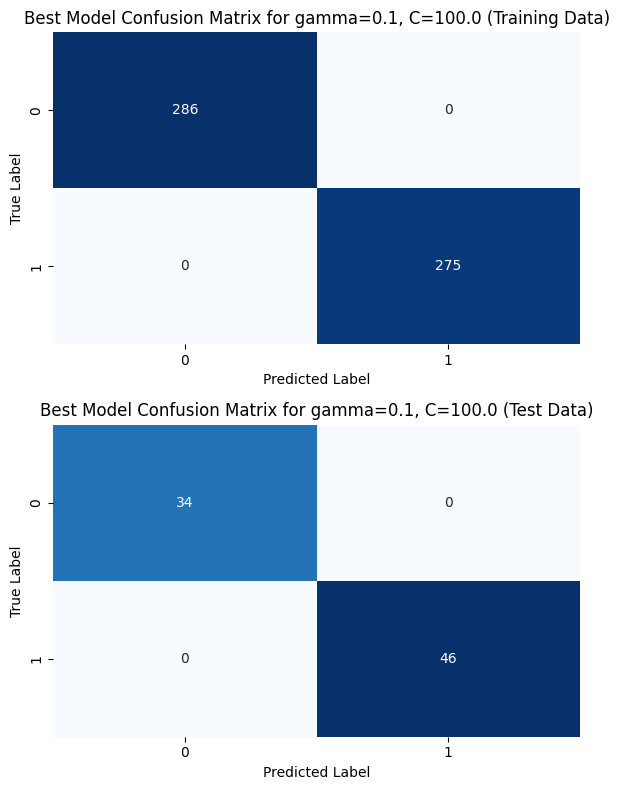

In [ ]:
# Plot confusion matrices as heatmaps
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
sns.heatmap(train_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title(f"Best Model Confusion Matrix for gamma={best_gamma}, C={best_C} (Training Data)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(test_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title(f"Best Model Confusion Matrix for gamma={best_gamma}, C={best_C} (Test Data)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


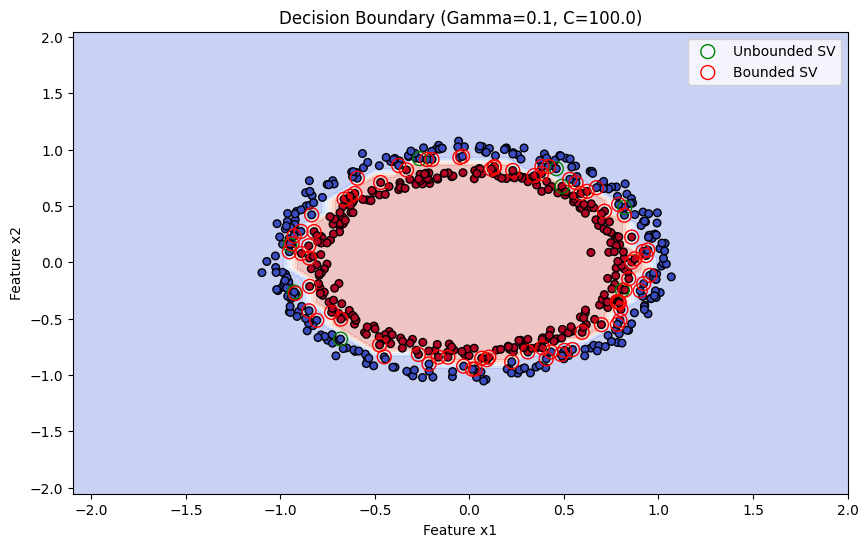

In [ ]:
# Plot decision region for the best model with support vectors marked
def plot_decision_boundary_with_support_vectors(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolor='k')

    # Mark bounded and unbounded support vectors
    support_vectors = model.support_vectors_
    dual_coef = model.dual_coef_.flatten()
    C = model.C

    # Unbounded support vectors (0 < alpha < C)
    unbounded_sv = support_vectors[(np.abs(dual_coef) < C) & (np.abs(dual_coef) > 0)]
    # Bounded support vectors (alpha = C)
    bounded_sv = support_vectors[np.abs(dual_coef) == C]

    plt.scatter(unbounded_sv[:, 0], unbounded_sv[:, 1], s=100, facecolors='none', edgecolors='green', label='Unbounded SV')
    plt.scatter(bounded_sv[:, 0], bounded_sv[:, 1], s=100, facecolors='none', edgecolors='red', label='Bounded SV')

    plt.title(title)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')
    plt.legend()
    plt.show()

# Use this function to plot the decision boundary and mark bounded and unbounded support vectors
plot_decision_boundary_with_support_vectors(
    best_model, X_train, y_train,
    f"Decision Boundary (Gamma={best_gamma}, C={best_C})"
)